In [1]:
import numpy as np

# Sample sentence
sentence = "Apple released a new iPhone"

# Simplified embeddings (embedding size = 4)
embedding_dict = {
    'apple': [0.1, 0.2, 0.3, 0.4],
    'released': [0.5, 0.6, 0.7, 0.8],
    'a': [0.9, 0.1, 0.2, 0.3],
    'new': [0.4, 0.5, 0.6, 0.7],
    'iphone': [0.8, 0.9, 0.1, 0.2]
}

# Input embeddings
X = np.array([embedding_dict[word.lower()] for word in sentence.split()])

# Weight matrices
np.random.seed(0)
W_Q = np.random.rand(4, 4)
W_K = np.random.rand(4, 4)
W_V = np.random.rand(4, 4)

# Compute Q, K, V
Q = X.dot(W_Q)
K = X.dot(W_K)
V = X.dot(W_V)

# Compute Attention Scores
d_k = Q.shape[-1]
scores = Q.dot(K.T) / np.sqrt(d_k)

# Apply softmax
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=1, keepdims=True)

attention_weights = softmax(scores)

# Generate Contextual Embeddings
contextual_embeddings = attention_weights.dot(V)

print("Contextual Embeddings:\n", contextual_embeddings)

Contextual Embeddings:
 [[1.08271512 1.18334547 0.9178196  0.80773049]
 [1.18955861 1.2959518  1.03999499 0.87574912]
 [1.1260734  1.22935924 0.96608441 0.83893985]
 [1.16904085 1.27443653 1.0162047  0.86453295]
 [1.16751743 1.27299343 1.01260794 0.85971067]]


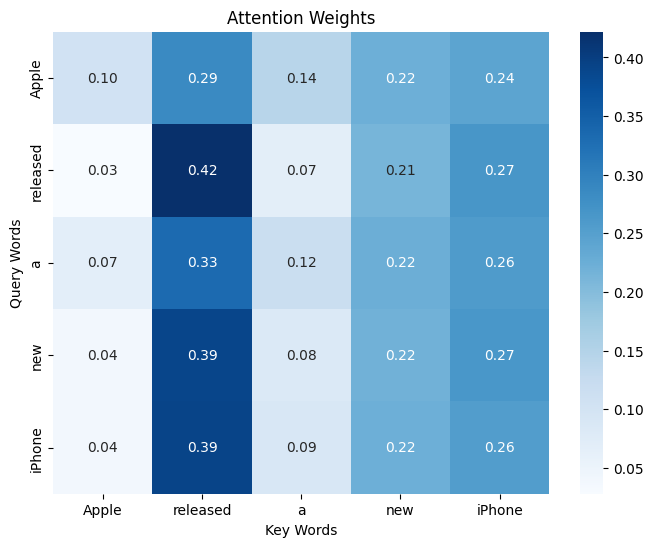

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap of attention weights
plt.figure(figsize=(8, 6))
sns.heatmap(attention_weights, annot=True, fmt=".2f",
            xticklabels=sentence.split(), yticklabels=sentence.split(),
            cmap='Blues')
plt.title('Attention Weights')
plt.xlabel('Key Words')
plt.ylabel('Query Words')
plt.show()